# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
1. Нужно определить рыночную стоимость объектов недвижимости. 
2. Задача — установить параметры. 
3. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Описание данных:

**total_images** — число фотографий квартиры в объявлении;

**last_price** — цена на момент снятия с публикации;

**total_area** — площадь квартиры в квадратных метрах (м²);

**first_day_exposition** — дата публикации;

**rooms** — число комнат;

**ceiling_height** — высота потолков (м);

**floors_total** — всего этажей в доме;

**living_area** — жилая площадь в квадратных метрах (м²);

**floor** — этаж;

**is_apartment** — апартаменты (булев тип);

**studio** — квартира-студия (булев тип);

**open_plan** — свободная планировка (булев тип);

**kitchen_area** — площадь кухни в квадратных метрах (м²);

**balcony** — число балконов;

**locality_name** — название населённого пункта;

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м);

**cityCenters_nearest** — расстояние до центра города (м);

**parks_around3000** — число парков в радиусе 3 км;

**parks_nearest** — расстояние до ближайшего парка (м);

**ponds_around3000** — число водоёмов в радиусе 3 км;

**ponds_nearest** — расстояние до ближайшего водоёма (м);

**days_exposition** — сколько дней было размещено объявление (от публикации до снятия).

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вопрос-Изучите-время-продажи-квартиры.-Постройте-гистограмму.-Посчитайте-среднее-и-медиану.-Опишите,-сколько-обычно-занимает-продажа.-Когда-можно-считать,-что-продажи-прошли-очень-быстро,-а-когда-необычно-долго?" data-toc-modified-id="Вопрос-Изучите-время-продажи-квартиры.-Постройте-гистограмму.-Посчитайте-среднее-и-медиану.-Опишите,-сколько-обычно-занимает-продажа.-Когда-можно-считать,-что-продажи-прошли-очень-быстро,-а-когда-необычно-долго?-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Вопрос Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?</a></span></li><li><span><a href="#Вопрос-Уберите-редкие-и-выбивающиеся-значения.-Опишите,-какие-особенности-обнаружили" data-toc-modified-id="Вопрос-Уберите-редкие-и-выбивающиеся-значения.-Опишите,-какие-особенности-обнаружили-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Вопрос Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили</a></span></li><li><span><a href="#Вопрос-Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-Изучите,-зависит-ли-цена-от-квадратного-метра,-числа-комнат,-этажа-(первого-или-последнего),-удалённости-от-центра.-Также-изучите-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года" data-toc-modified-id="Вопрос-Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-Изучите,-зависит-ли-цена-от-квадратного-метра,-числа-комнат,-этажа-(первого-или-последнего),-удалённости-от-центра.-Также-изучите-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Вопрос Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года</a></span></li><li><span><a href="#Вопрос-Выберите-10-населённых-пунктов-с-наибольшим-числом-объявлений.-Посчитайте-среднюю-цену-квадратного-метра-в-этих-населённых-пунктах.-Выделите-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья.-Эти-данные-можно-найти-по-имени-в-столбце-locality_name" data-toc-modified-id="Вопрос-Выберите-10-населённых-пунктов-с-наибольшим-числом-объявлений.-Посчитайте-среднюю-цену-квадратного-метра-в-этих-населённых-пунктах.-Выделите-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья.-Эти-данные-можно-найти-по-имени-в-столбце-locality_name-4.0.4"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>Вопрос Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name</a></span></li><li><span><a href="#Вопрос-Изучите-предложения-квартир:-для-каждой-квартиры-есть-информация-о-расстоянии-до-центра.-Выделите-квартиры-в-Санкт-Петербурге-(locality_name).-Ваша-задача-—-выяснить,-какая-область-входит-в-центр.-Создайте-столбец-с-расстоянием-до-центра-в-километрах:-округлите-до-целых-значений.-После-этого-посчитайте-среднюю-цену-для-каждого-километра.-Постройте-график:-он-должен-показывать,-как-цена-зависит-от-удалённости-от-центра.-Определите-границу,-где-график-сильно-меняется-—-это-и-будет-центральная-зона" data-toc-modified-id="Вопрос-Изучите-предложения-квартир:-для-каждой-квартиры-есть-информация-о-расстоянии-до-центра.-Выделите-квартиры-в-Санкт-Петербурге-(locality_name).-Ваша-задача-—-выяснить,-какая-область-входит-в-центр.-Создайте-столбец-с-расстоянием-до-центра-в-километрах:-округлите-до-целых-значений.-После-этого-посчитайте-среднюю-цену-для-каждого-километра.-Постройте-график:-он-должен-показывать,-как-цена-зависит-от-удалённости-от-центра.-Определите-границу,-где-график-сильно-меняется-—-это-и-будет-центральная-зона-4.0.5"><span class="toc-item-num">4.0.5&nbsp;&nbsp;</span>Вопрос Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона</a></span></li><li><span><a href="#Вопрос-Выделите-сегмент-квартир-в-центре.-Проанализируйте-эту-территорию-и-изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Также-выделите-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления).-Сделайте-выводы.-Отличаются-ли-они-от-общих-выводов-по-всей-базе?" data-toc-modified-id="Вопрос-Выделите-сегмент-квартир-в-центре.-Проанализируйте-эту-территорию-и-изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Также-выделите-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления).-Сделайте-выводы.-Отличаются-ли-они-от-общих-выводов-по-всей-базе?-4.0.6"><span class="toc-item-num">4.0.6&nbsp;&nbsp;</span>Вопрос Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [14]:
try:
    import phik
    print("Модуль 'phik' установлен.")
except ModuleNotFoundError:
    print("Модуль 'phik' не установлен.")
    !pip install phik
    import phik

Модуль 'phik' установлен.


In [15]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
from phik.report import plot_correlation_matrix
from phik import report
pd.set_option("display.max_columns", 29)
pd.set_option("display.max_rows", 100)

In [16]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('C:/Users/timpu/real_estate_data.csv', sep='\t')
print('Общая информация о датасете:')
print(data.info(), '\n')
print('Колонки с пропущенными значениями:')
print(data.isnull().any()[data.isnull().any()].index.to_list(), '\n')
print('Количество дубликатов:', data.duplicated().sum(), '\n')
print('Минимальные значения:')
print(data.min(), '\n')
print('Максимальные значения:')
print(data.max(), '\n')
print('Пропуски kitchen_area и studio (считаем, что в студиях нет кухни):')
print(data[(data['studio']) & (data['kitchen_area'].isna())][['studio', 'kitchen_area']], '\n')
print('Пропуски kitchen_area и studio (проверяем выделены ли в студиях кухни):')
print(data[(data['studio']) & (data['kitchen_area'].notna())][['studio', 'kitchen_area']], '\n')
print('Сумма пропусков в kitchen_area:', '\n')
print(data['kitchen_area'].isna().sum(), '\n')
print('Сумма пропусков в living_area:', '\n')
print(data['living_area'].isna().sum(), '\n')
print('Корреляция Пирсона kitchen_area:', '\n')
print(data[['kitchen_area', 'last_price', 'total_area', 'rooms']].corr()['kitchen_area'].sort_values(ascending=False), '\n')
print('Корреляция Пирсона living_area:', '\n')
print(data[['living_area', 'last_price', 'total_area', 'rooms']].corr()['living_area'].sort_values(ascending=False))
data

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  obj

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


### Вывод

Представленные в датасете данные имеют пропуски в большинстве колонок. Cтолбец рыночной стоимости заполнен полностью, что обеспечивает гибкость в выборе параметров для оценки рыночной стоимости недвижимости. Пропуски в столбцах:
is_apartment(неправильный тип данных, правильный bool), заместим False;
balcony, заместим 0; 
first_day_exposition - неправильный тип данных (правильный - datetime),
часть пропусков в kitchen_area заместим '0', так как в студиях нет кухонь, а часть заместим значениями пропорциональными отношению средних заполненных значений указанных столбцов и total_area. Также сделаем и для living_area.
Представленный датасет не содержит дубликатов записей.
Можно сформулировать следующие предположения о причинах появления пропусков:
- в столбцах, содержащих значения типа bool, а также, в столбцах содержащих нормированные параметры (balcony- заполним '0', floors_total - заполним медианными значениями по соотвествующему региону места нахождения квартиры с пропуском этажности).
- в airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest') - пропуски в связи с интуитивным поведением пользователей, не заполняющих ячейки отсутующих признаков или признаков, величина которых находится за пределами их значимости при выборе объекта (слишком большая удаленность);
- в столбце ceiling_height - пропуски по причине массовости предложения в стандартных сериях домов, имеющих стандартные параметры высоты потолков;
- locality_name - пропуски по причине невнимательности пользователей;
- living_area и kitchen_area - пропуски по причине отсуствия выделенных по назначению помещений - кухонь и комнат.

## Предобработка данных

In [17]:
df = data.copy()
try:
    for col in df.columns:
        if col == 'balcony':
            df[col] = df[col].fillna('0')
        if col == 'kitchen_area':
            df[col] = df[df['studio'] & df[col].isna()].fillna('0')
            df[col] = df[col].fillna(df[df[col].isna()]['total_area'] * 
                                             (df[df[col].notna()][col].mean() / 
                                              df[df[col].notna()]['total_area'].mean())
                                            )
        if col == 'living_area':
            df[col] = df[col].fillna(df[df[col].isna()]['total_area'] * 
                                             (df[df[col].notna()][col].mean() / 
                                              df[df[col].notna()]['total_area'].mean())
                                            )
        if col == 'floors_total':
             df[col] = df[col].fillna(df.groupby('locality_name', dropna=False)[col].transform("median"))
        if col == 'is_apartment':
            df[col] = df[col].fillna(value=False).astype('bool')
        if col == 'first_day_exposition':
             df[col] = pd.to_datetime(df[col], format='%Y-%m-%dT%H:%M:%S')
except:
    print('Возникла ошибка, нужно перепроверить!')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

In [18]:
df['meter_price'] = df['last_price'] / df['living_area']
df['weekday_exposition'] = df['first_day_exposition'].dt.dayofweek
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
df['floor_category'] = df.apply(lambda x: 'последний' if x['floor'] == x['floors_total'] else ('первый' if x['floor'] == 1 else 'другой'), axis=1)
df['liv/tot_area'] = df['living_area'] / df['total_area']
df['kit/tot_area'] = df['kitchen_area'] / df['total_area']

## Исследовательский анализ данных

In [19]:
df[['last_price', 'total_area', 'rooms', 'ceiling_height']].describe()

,last_price,total_area,rooms,ceiling_height
count,2.369900e+04,23699.000000,23699.000000,14504.000000
mean,6.541549e+06,60.348651,2.070636,2.771499
std,1.088701e+07,35.654083,1.078405,1.261056
min,1.219000e+04,12.000000,0.000000,1.000000
25%,3.400000e+06,40.000000,1.000000,2.520000
50%,4.650000e+06,52.000000,2.000000,2.650000
75%,6.800000e+06,69.900000,3.000000,2.800000
max,7.630000e+08,900.000000,19.000000,100.000000


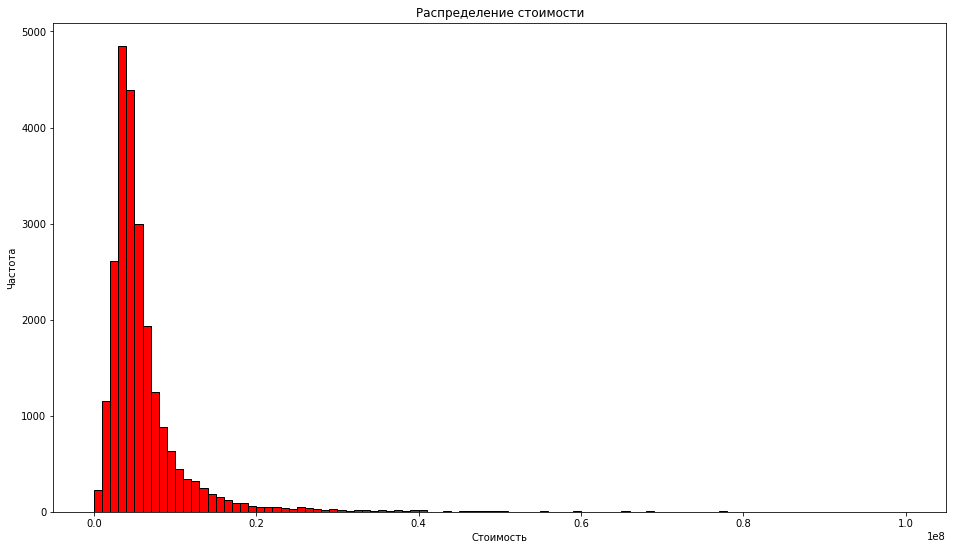

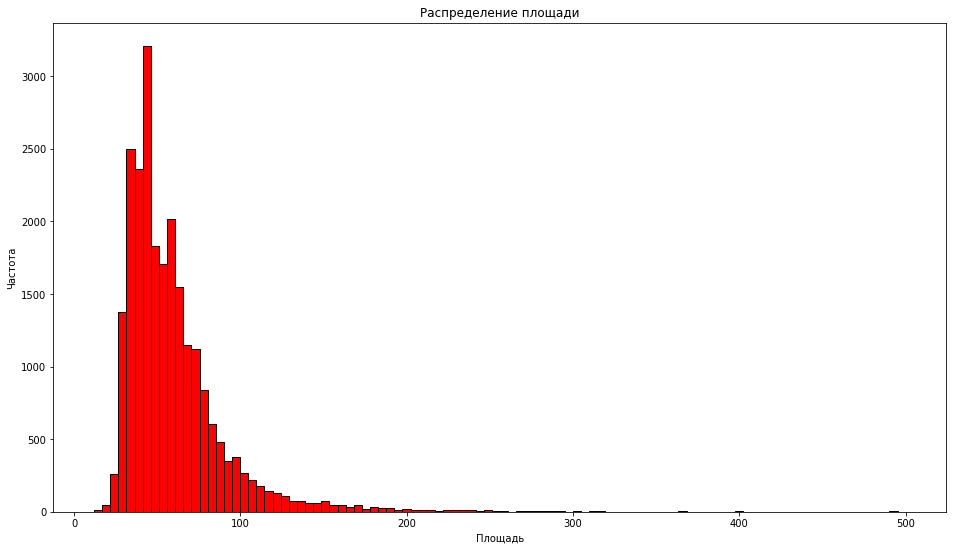

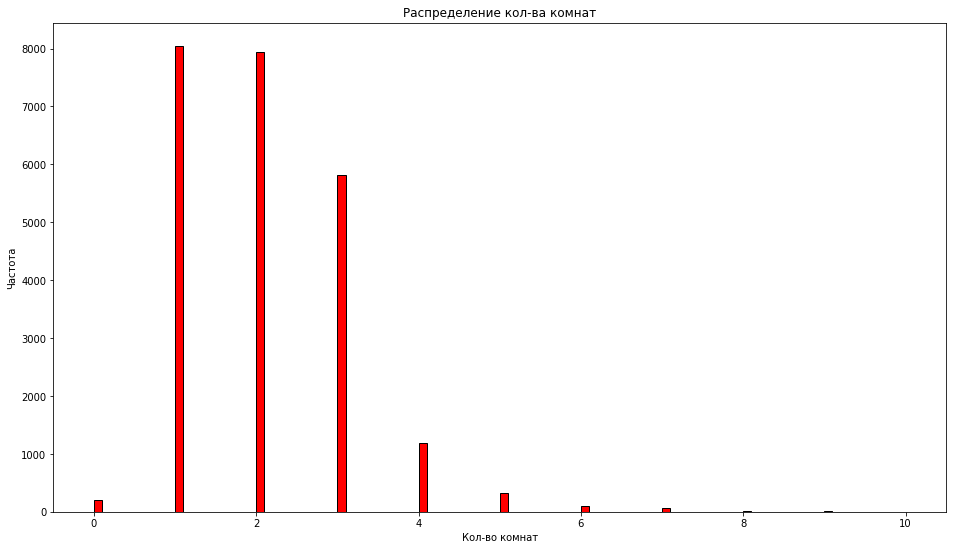

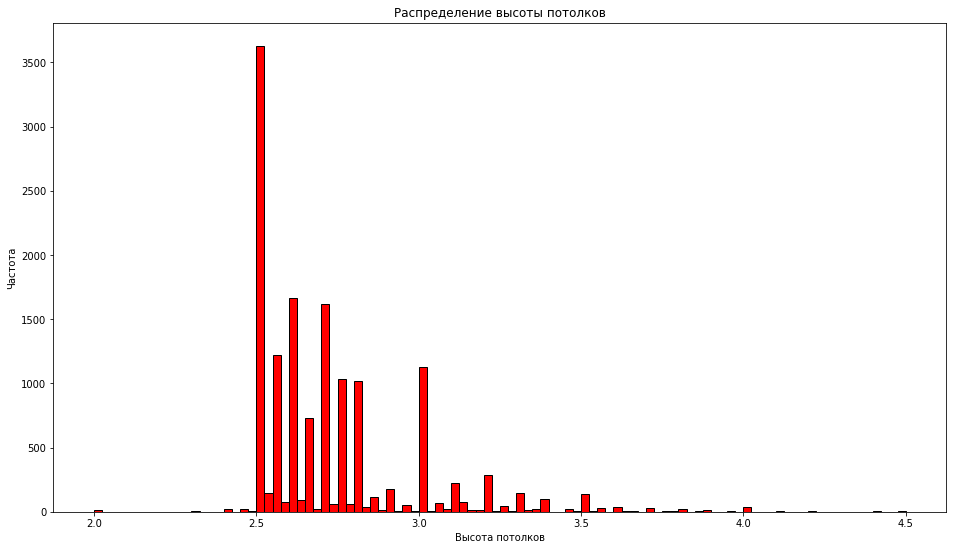

In [20]:
l_dict = {
    'last_price': ['Распределение стоимости', 'Стоимость', [0,1*10**8]],
    'total_area': ['Распределение площади', 'Площадь', [12,500]],
    'rooms': ['Распределение кол-ва комнат','Кол-во комнат', [0, 10]],
    'ceiling_height': ['Распределение высоты потолков', 'Высота потолков', [2, 4.5]]
         }

for key in l_dict:
    plt.figure(figsize=(16,9))
    df[key].hist(bins=100, color = 'red', edgecolor = 'black',
                             grid = False, 
                 range=l_dict[key][2]
                             );
    
    plt.title(l_dict[key][0])
    plt.xlabel(l_dict[key][1])
    plt.ylabel("Частота")
    plt.show();

Рассмотрев графики распределений запрошенных параметров можно прийти к выводу, что распределения приведенных параметров стремятся к нормальному распределению, однако из-за большого количества выбросов (необычайно высоких значений) графики смещены влево с большым хвостом вследствие наличия аномально высоких значений в данных - распределения с положительной ассиметрией. Графики иллюстрируют  Распеределения 

#### Вопрос Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

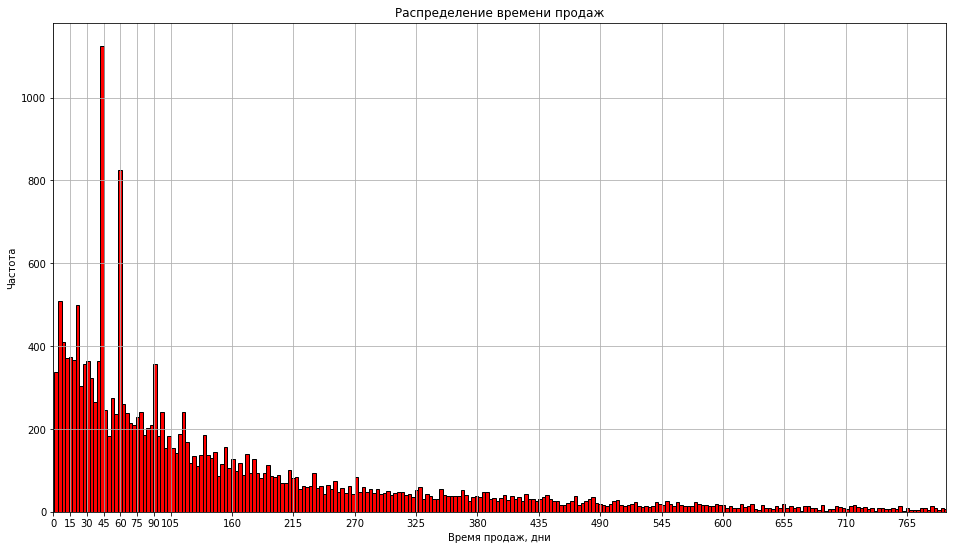

Среднее значение: 180.88863436982163
Медианное значение: 95.0


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [21]:
plt.figure(figsize=(16,9))
df_de = df[df['days_exposition'].notna()].copy()
df_de['days_exposition'] = pd.to_numeric(df['days_exposition'])
df_de['days_exposition'].hist(
    bins=499,
    color = 'red', edgecolor = 'black',
                             grid = True,
                             );
plt.xticks(list(range(0, 100, 15))+list(range(105, 800, 55)))
plt.xlim(0,800)
plt.title('Распределение времени продаж')
plt.xlabel('Время продаж, дни')
plt.ylabel("Частота")
plt.show();
print('Среднее значение:', df_de['days_exposition'].mean())
print('Медианное значение:', df_de['days_exposition'].median())
df_de['days_exposition'].isna().sum()

df_de['days_exposition'].describe()

В целях минимизации влияния пропусков на результаты исследования, нами исследованы записи датасета, за исключением записей содержащих пропуски в days_exposition. В большинстве случаев продажа занимает около 95 дней (медиана выборки). Из-за наличия в датасете очень долгих продаж среднее тяготеет к верхней границе и почти в два раза больше медианы. При продаже квартиры до 45 дней от даты публикации можно считать, что продажа прошла очень быстро (1-ый квартиль), для случаев продажи от 232 дней (3-ий квартиль) можно считать, что продажи прошли необычно долго.
Два пика частоты продаж приходятся на период от 40 до 60 дней, данные пики выглядят аномальными, т.к. приходятся на короткие временные интервалы и отличаются в разы от соседних аналогичных интервалов. Гипотеза наличия пропусков в days_exposition - данные предложения ещё не реализованы, статистику продаж по ним исследовать невозможно. Гипотеза пиков частоты - аномальность частоты продаж связана с применяемыми мерами поощрения риелторов, какими-либо бонусными условиями, вследствие которых риэлтор заполняет продажи на определённый день со дня размещения (42, 60) для максимизации своей выгоды.

#### Вопрос Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили

total_images - граница верхнего уса ящика = 26.0
total_images - граница нижнего уса ящика = 0

last_price - граница верхнего уса ящика = 11900000.0
last_price - граница нижнего уса ящика = 0

total_area - граница верхнего уса ящика = 114.75
total_area - граница нижнего уса ящика = 0

rooms - граница верхнего уса ящика = 6.0
rooms - граница нижнего уса ящика = 0

ceiling_height - граница верхнего уса ящика = nan
ceiling_height - граница нижнего уса ящика = 0

floors_total - граница верхнего уса ящика = 32.5
floors_total - граница нижнего уса ящика = 0

living_area - граница верхнего уса ящика = 76.75
living_area - граница нижнего уса ящика = 0

floor - граница верхнего уса ящика = 17.0
floor - граница нижнего уса ящика = 0

kitchen_area - граница верхнего уса ящика = 32.07
kitchen_area - граница нижнего уса ящика = 0

airports_nearest - граница верхнего уса ящика = nan
airports_nearest - граница нижнего уса ящика = 0

cityCenters_nearest - граница верхнего уса ящика = nan
cityCenters_ne

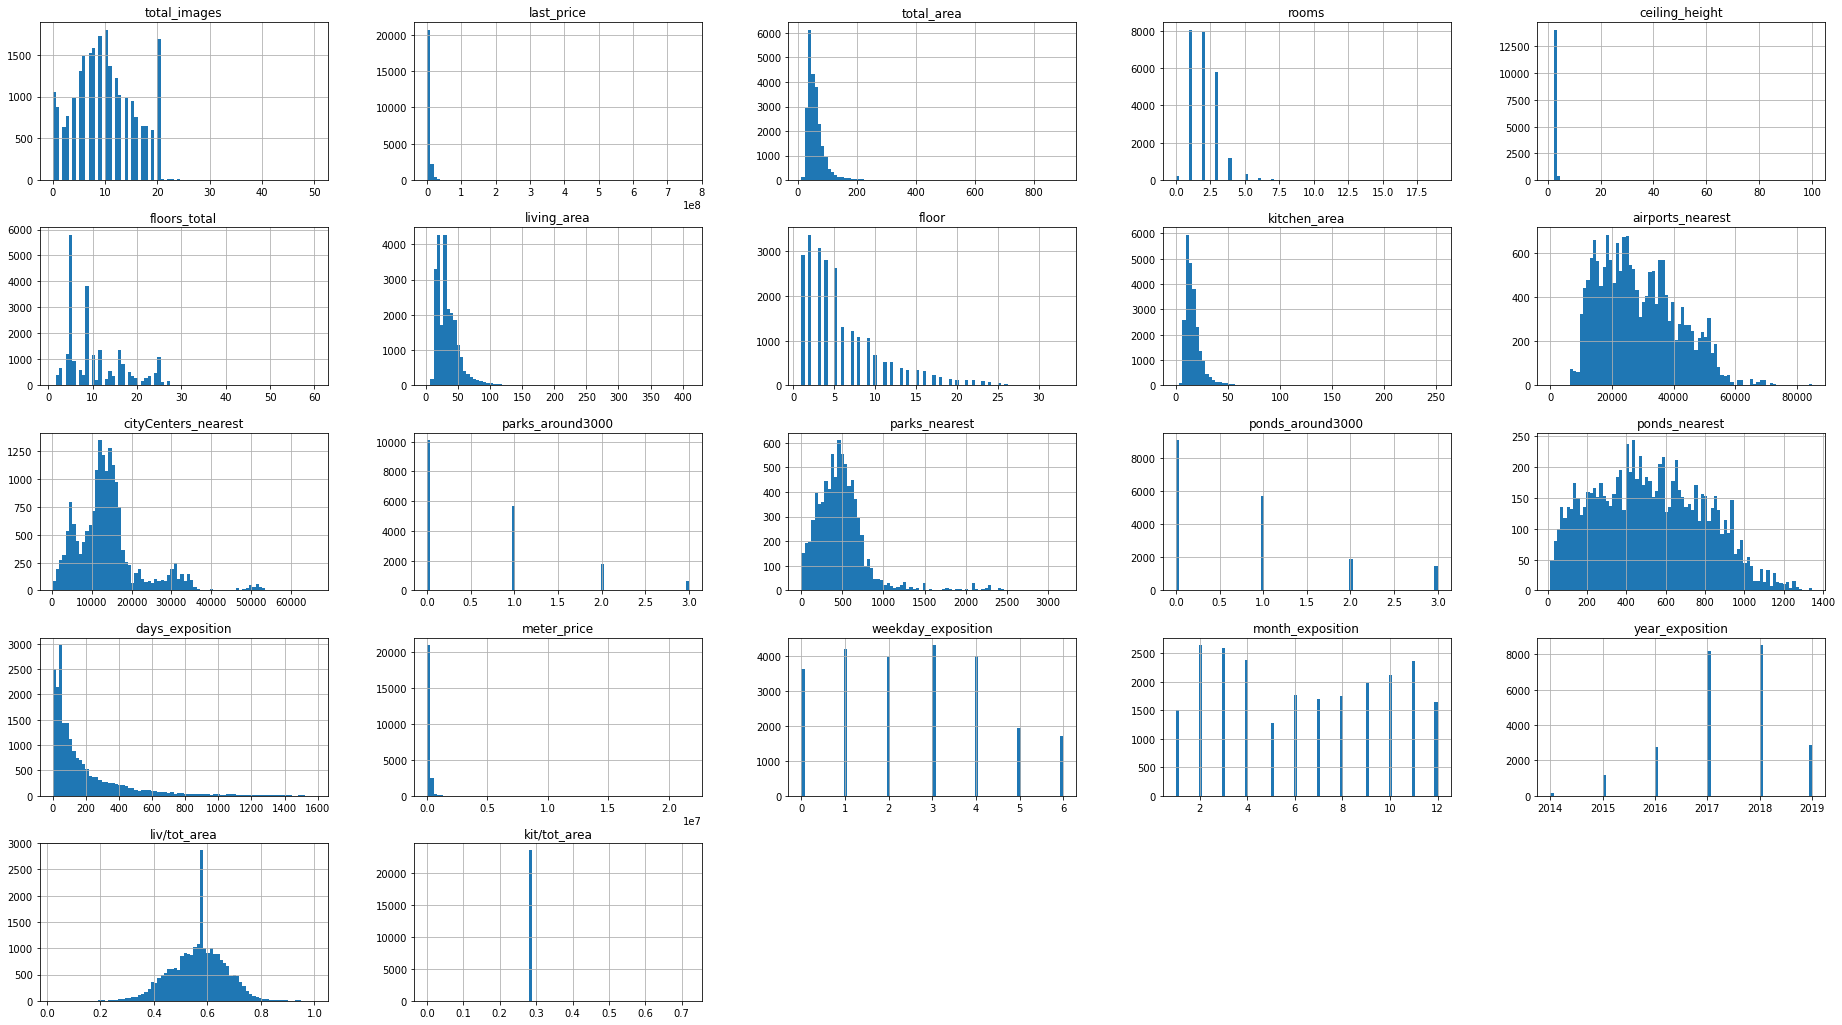

In [22]:
df_clear = df.copy()
col_ns = []
num_cl = 0 
for col in df_clear.columns:
    try:
        q25, q75 = np.percentile(df_clear[col], [25, 75])
        IQR = q75 - q25
        max_ = round(q75+(1.5*IQR), 2)
        min_ = round(q25-(1.5*IQR), 2)
        print(col, f'- граница верхнего уса ящика = {max_}') if max_ != df_clear[col].max() else print(col, '- граница верхнего уса ящика = максимальному значению')
        print(col, f'- граница нижнего уса ящика = {min_}\n') if min_ >= 0 else print(col, '- граница нижнего уса ящика = 0\n')
        num_cl += df_clear.loc[df_clear[col] < min_, col].count()
        df_clear.loc[df_clear[col] < min_, col] = df_clear[col].median()
        num_cl += df_clear.loc[df_clear[col] > max_, col].count()
        df_clear.loc[df_clear[col] > max_, col] = df_clear[col].median()
        col_ns.append(col)
    except:
        next
print('Датасет с редкими и выбивающимися (аномальными) значениями:')
df[col_ns].hist(bins = 80, figsize=(32,18));

Датасет без редких и выбивающихся (аномальных) значений: 

Доля редких и выбивающихся (аномальных) значений к исходному количеству записей составляет:
138.42000000000002 %


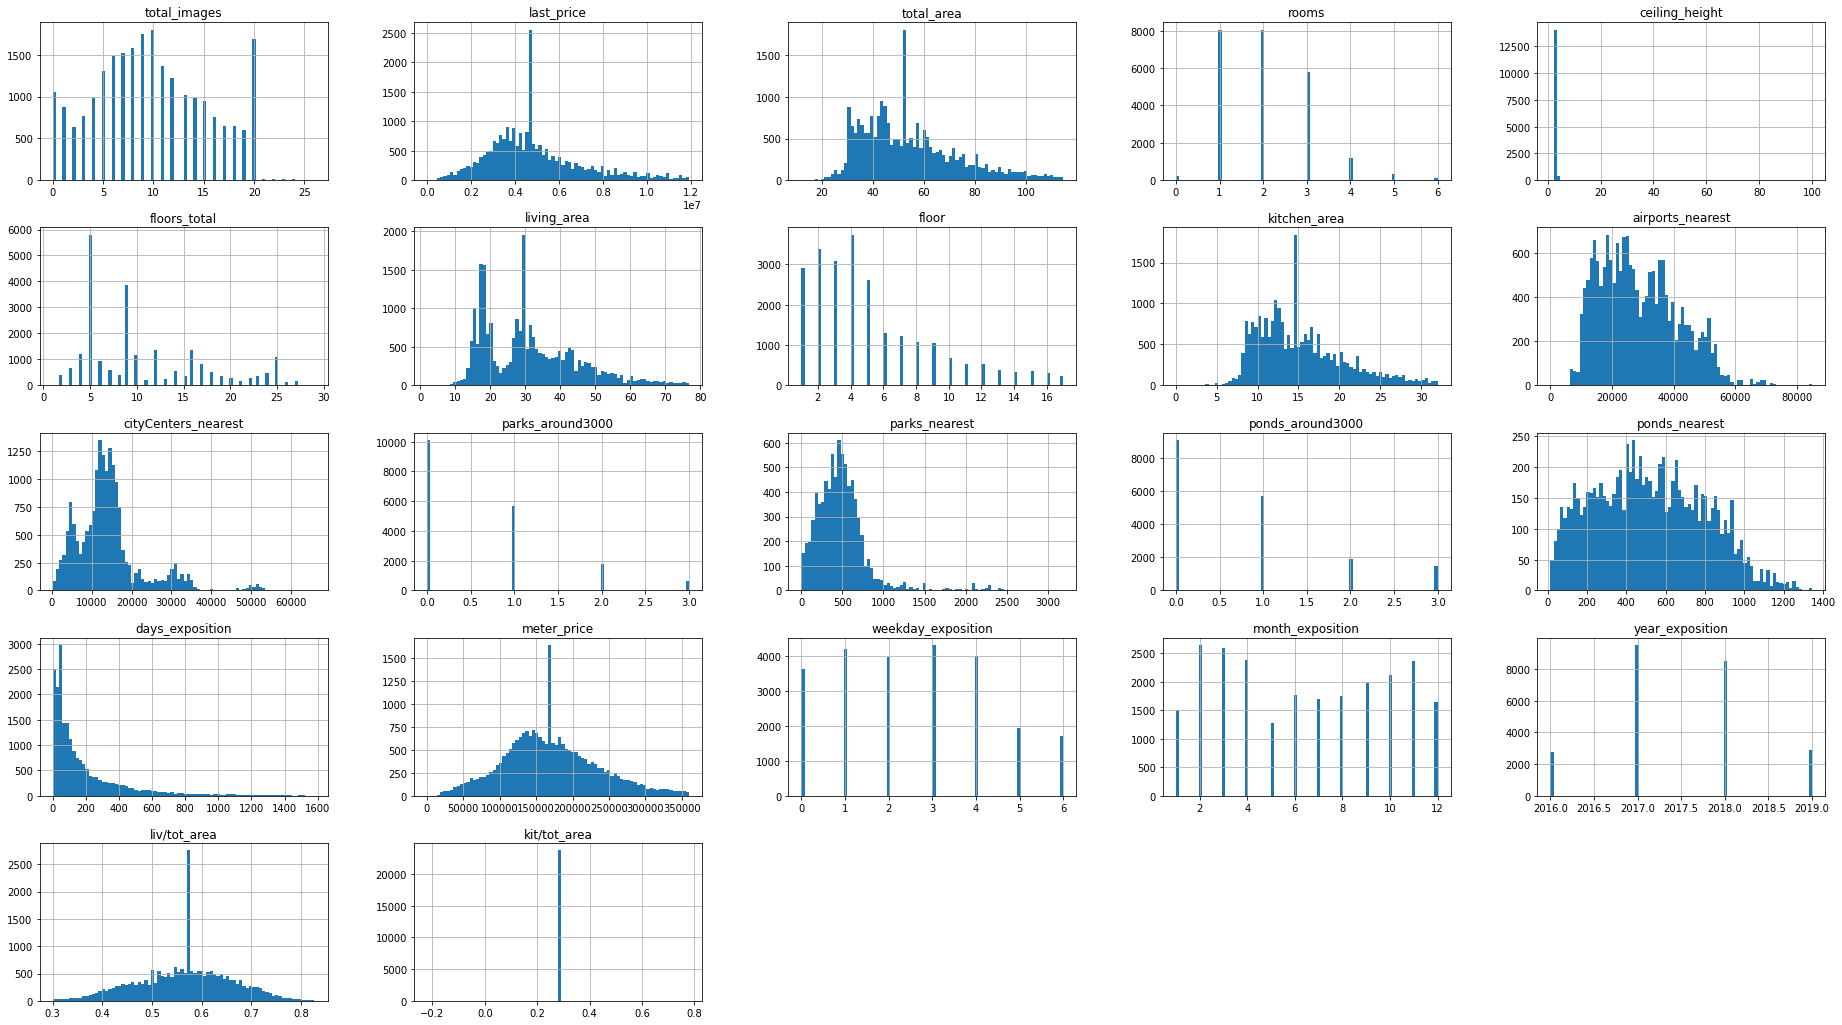

In [23]:
print('Датасет без редких и выбивающихся (аномальных) значений:', '\n')
df_clear[col_ns].hist(bins = 80, figsize=(32,18));
print('Доля редких и выбивающихся (аномальных) значений к исходному количеству записей составляет:')
print(round(num_cl/df.shape[0], 4)*100, '%')

При исключении редких и выбивающихся значений по универсальному методу с использованием межквартильного размаха(+-1,5IQR), выявлено, что у 15 из 23 исследуемых параметров граница нижнего уса равна нолю, так как её рассчитанное значение меньше ноля. Таким образом, в большинстве параметров датасета выбросами являются необычно высокие значения, что возможно из-за пропуска запятых или указания лишних нулей, а равно иных грамматических ошибок при заполнении значений датасета. Доля редких и выбивающихся (аномальных) при применении универсального метода с использованием межквартильного размаха значений составила 8,24 % - эти данные были замещены медианой соотвествующей колонки датасета.

#### Вопрос Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года

In [11]:
print('Фи_Ка значений исследуемых параметров по цене(last_price):')
print(df_clear[['last_price', 'meter_price', 'total_area', 'rooms', 'floor_category', 'cityCenters_nearest']].phik_matrix()['last_price'].sort_values(ascending=False))
print('\n')
print('Корреляция Пирсона значений исследуемых параметров по цене(last_price):')
print(df_clear[['last_price','meter_price', 'total_area', 'rooms', 'floor_category', 'cityCenters_nearest']].corr()['last_price'].sort_values(ascending=False))
df_clear.describe()

Фи_Ка значений исследуемых параметров по цене(last_price):
interval columns not set, guessing: ['last_price', 'meter_price', 'total_area', 'rooms', 'cityCenters_nearest']
last_price             1.000000
meter_price            0.737875
total_area             0.666682
cityCenters_nearest    0.390856
rooms                  0.365903
floor_category         0.219475
Name: last_price, dtype: float64


Корреляция Пирсона значений исследуемых параметров по цене(last_price):
last_price             1.000000
total_area             0.601694
meter_price            0.391488
rooms                  0.382955
cityCenters_nearest   -0.288200
Name: last_price, dtype: float64


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_exposition,month_exposition,year_exposition,liv/tot_area,kit/tot_area
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,2.369900e+04
mean,9.832482,4.831709e+06,54.241168,2.047724,2.771499,10.633086,31.480718,5.231613,15.159838,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634,170132.468372,2.569307,6.400101,2017.484999,0.566389,2.794895e-01
std,5.625118,2.132798e+06,18.878688,1.004863,1.261056,6.517156,13.499118,3.803910,5.286362,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988,64256.784405,1.789082,3.491561,0.853013,0.094300,1.110246e-16
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,380.937500,0.000000,1.000000,2016.000000,0.300000,2.794895e-01
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,11.179581,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,126829.268293,1.000000,3.000000,2017.000000,0.504557,2.794895e-01
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,14.533455,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000,167613.636364,3.000000,6.000000,2017.000000,0.573445,2.794895e-01
75%,14.000000,5.800000e+06,64.500000,3.000000,2.800000,16.000000,40.000000,7.000000,18.027074,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,209048.647744,4.000000,10.000000,2018.000000,0.629630,2.794895e-01
max,26.000000,1.190000e+07,114.600000,6.000000,100.000000,29.000000,76.700000,17.000000,32.029500,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,359600.000000,6.000000,12.000000,2019.000000,0.827586,2.794895e-01


Факторы, оказывающие влияние можно распределить по степени влияния: в первую очередь, оказывают влияние цена квадратного метра и общая площадь квартиры, во-вторую очередь - удалённость от центра города и количество комнат в квартире, в третью очередь - этаж расположения квартиры.

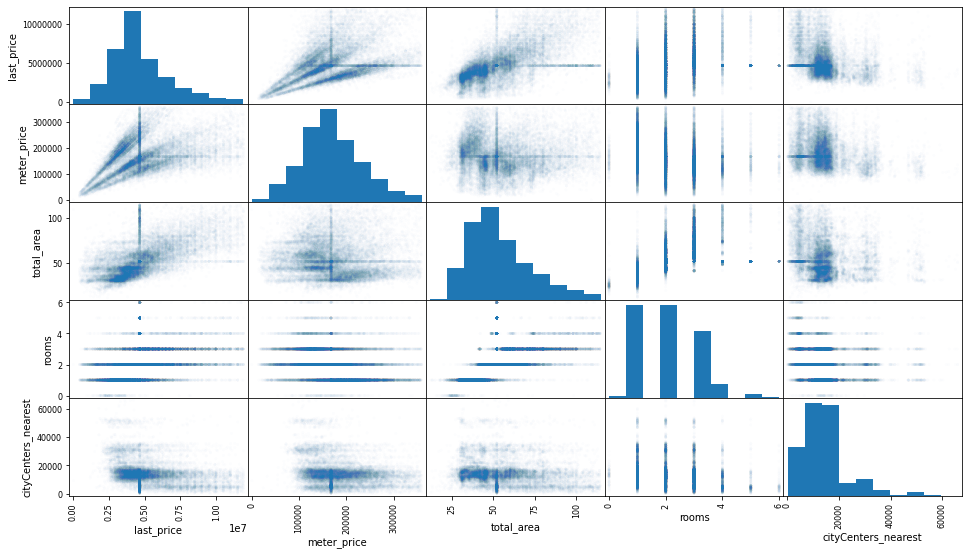

In [12]:
pd.plotting.scatter_matrix(df_clear[['last_price', 'meter_price', 'total_area', 'rooms', 'cityCenters_nearest']], figsize=(16,9), alpha=0.01);

Из полученной матрицы диаграмм рассеяния можно сделать следующие выводы: цена квартир зависит от стоимости квадратного метра - заметно три луча, показывающих прямую зависимость. Каждый луч демонстрирует группу квартир, в которых при разной интенсивности роста стоимости квадратного метра наблюдается разная интенсивность роста стоимости квартиры. Гипотеза - лучи соотвествют группам квартир разной комнатности, где квадратный метр в 1-комн квартире стоит дороже чем в 3-х комн.
Цена квартир также прямо зависит от комнатности - чем больше комнат, тем выше начальная стоимость квартир, тем больше дорогих квартир.
Цена квартир до 0.75(1е7) не связана с удалённостью от центра города таким образом, что большинство этих предложений расположено на удалении 13 км от центра. Гипотеза - большинство предложений расположены в пригородах/спальных районах.

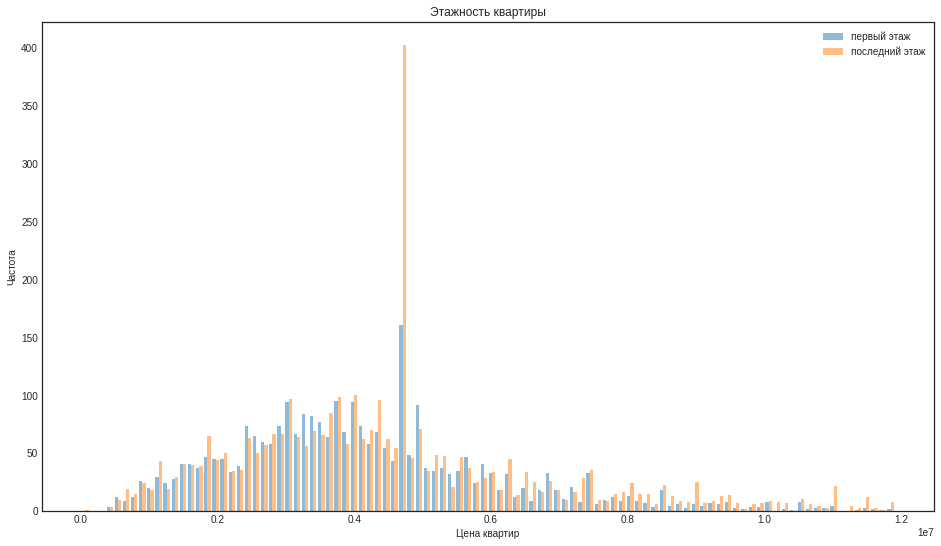

In [13]:
plt.style.use('seaborn-white')
plt.figure(figsize=(16,9))
plt.hist([df_clear[df_clear['floor_category'] == 'первый']['last_price'], df_clear[df_clear['floor_category'] == 'последний']['last_price']], bins=100, alpha=0.5, label=['первый этаж', 'последний этаж'])
plt.legend(loc='upper right')
plt.title(f'Этажность квартиры')
plt.xlabel('Цена квартир')
plt.ylabel("Частота")
plt.show();

Гистограмма показывает по данным датасета взаимосвязь цены объектов и этажа, на котором они расположены - частота продаж и стоимость объектов, расположенных на последнем этаже выше, чем на первом.

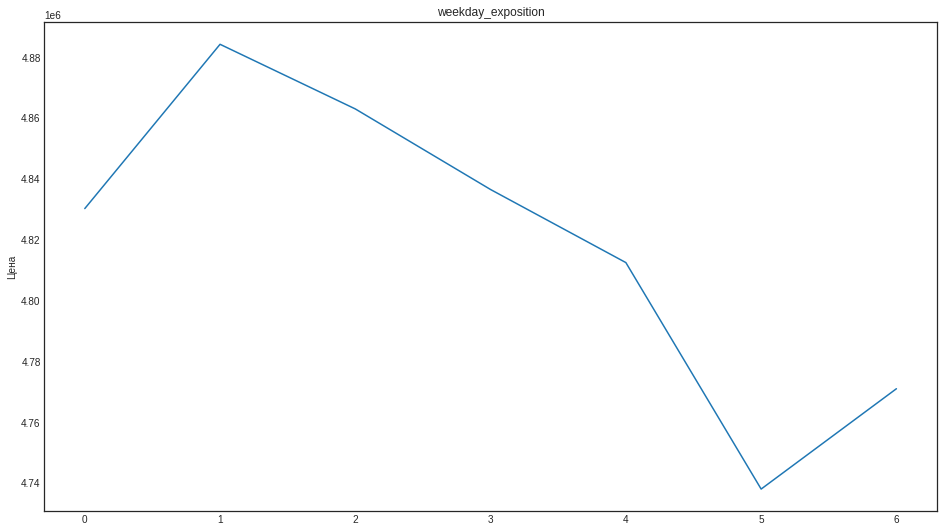

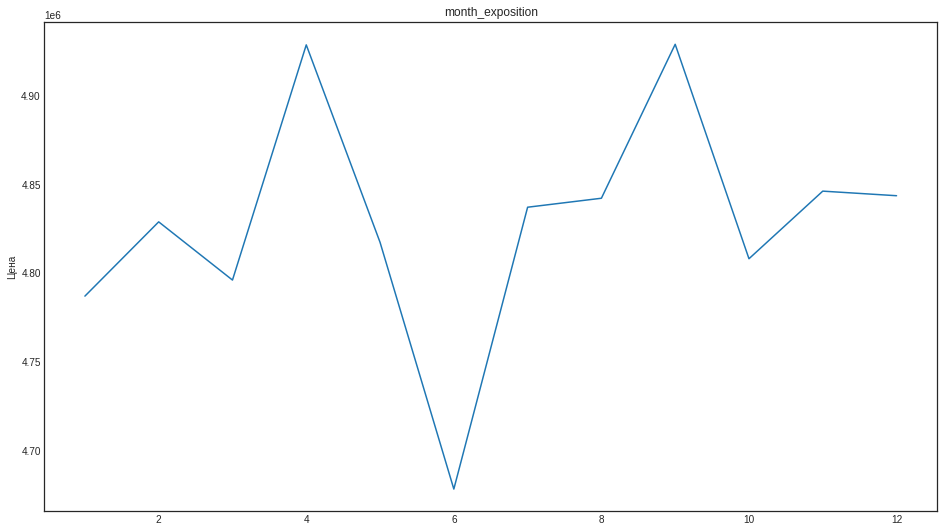

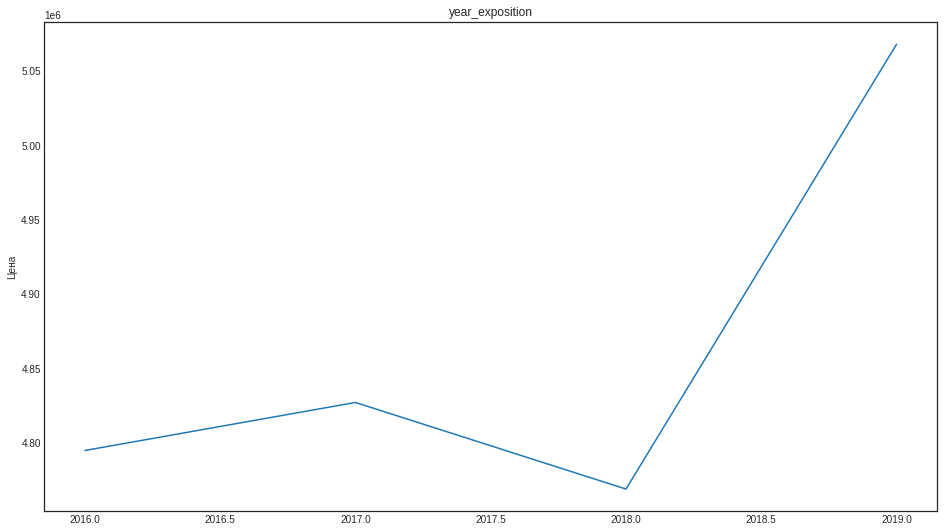

In [14]:
for col in ['weekday_exposition', 'month_exposition', 'year_exposition']:
    plt.figure(figsize=(16,9))
    plt.plot(df_clear.groupby(col)['last_price'].agg('mean'))
    plt.title(col)
    plt.ylabel("Цена")
    plt.show();

По полученным гафикам можно сделать вывод, что цена зависит от дня недели, месяца и года. Так средняя цена растёт ко вторнику, затем снижается к субботе. На месячном графике видно, что средняя цена к июню показывает свой минимум. По годовому графику видно, что цена в период кризиса 2018 года падала, затем к 2019 году показала сильный рост.

#### Вопрос Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name

In [15]:
print('10 населённых пунктов с наибольшим числом объявлений, средней ценой квадратного метра:\n')
print(df_clear.groupby('locality_name')['meter_price'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10))

10 населённых пунктов с наибольшим числом объявлений, средней ценой квадратного метра:

                   count           mean
locality_name                          
Санкт-Петербург    15721  191319.364977
посёлок Мурино       522  169806.681004
посёлок Шушары       440  153681.559235
Всеволожск           398  129017.046250
Пушкин               369  186001.055339
Колпино              338  132144.640899
посёлок Парголово    327  196095.716656
Гатчина              307  121854.544986
деревня Кудрово      299  183694.845977
Выборг               237   99360.044495


In [16]:
df_cts = df_clear.groupby('locality_name')['last_price'].agg(['count', 'max', 'min']).sort_values(by='count', ascending=False).head(10)

print('Из них населённые пункты с самой высокой стоимостью жилья:\n')
print(df_cts[df_cts['max'] == df_cts['max'].max()].drop(['count', 'min'], axis=1))
print('\nИз них населённые пункты с самой низкой стоимостью жилья:\n')
print(df_cts[df_cts['min'] == df_cts['min'].min()].drop(['count', 'max'], axis=1))

Из них населённые пункты с самой высокой стоимостью жилья:

                        max
locality_name              
Санкт-Петербург  11900000.0
Пушкин           11900000.0

Из них населённые пункты с самой низкой стоимостью жилья:

                     min
locality_name           
Санкт-Петербург  12190.0


In [17]:
print('10 населённых пунктов с самой высокой стоимостью жилья:\n')
print(df_clear.groupby('locality_name')['last_price'].agg(['count', 'max'])['max'].sort_values(ascending=False).head(10))

10 населённых пунктов с самой высокой стоимостью жилья:

locality_name
Пушкин              11900000.0
Санкт-Петербург     11900000.0
Кронштадт           11500000.0
Сестрорецк          11500000.0
Павловск            11300000.0
Петергоф            11100000.0
посёлок Репино      11067416.0
Всеволожск          11000000.0
деревня Хязельки    11000000.0
посёлок Шушары      10990000.0
Name: max, dtype: float64


In [18]:
print('10 населённых пунктов с самой низкой стоимостью жилья:\n')
print(df_clear.groupby('locality_name')['last_price'].agg(['count', 'min'])['min'].sort_values(ascending=True).head(10))

10 населённых пунктов с самой низкой стоимостью жилья:

locality_name
Санкт-Петербург                12190.0
Сланцы                        430000.0
посёлок станции Свирь         430000.0
деревня Старополье            440000.0
деревня Вахнова Кара          450000.0
деревня Ям-Тесово             450000.0
городской посёлок Будогощь    450000.0
поселок Совхозный             470000.0
деревня Выскатка              470000.0
деревня Чудской Бор           500000.0
Name: min, dtype: float64


#### Вопрос Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона

Средние значения цены по удалённости от центра СПБ:

                 last_price
cent_distance              
0.0            6.038148e+06
1.0            6.564182e+06
2.0            6.588755e+06
3.0            6.602145e+06
4.0            6.665074e+06
5.0            6.602084e+06
6.0            6.292599e+06
7.0            6.036433e+06
8.0            6.195457e+06
9.0            5.459776e+06
10.0           5.355048e+06
11.0           5.277754e+06
12.0           5.255112e+06
13.0           5.479127e+06
14.0           5.252989e+06
15.0           5.272756e+06
16.0           5.092287e+06
17.0           4.864301e+06
18.0           4.705600e+06
19.0           4.805255e+06
20.0           5.951465e+06
21.0           5.493469e+06
22.0           5.160427e+06
23.0           4.688906e+06
24.0           3.854430e+06
25.0           4.052840e+06
26.0           3.973013e+06
27.0           3.450000e+06
28.0           5.026429e+06
29.0           4.236667e+06


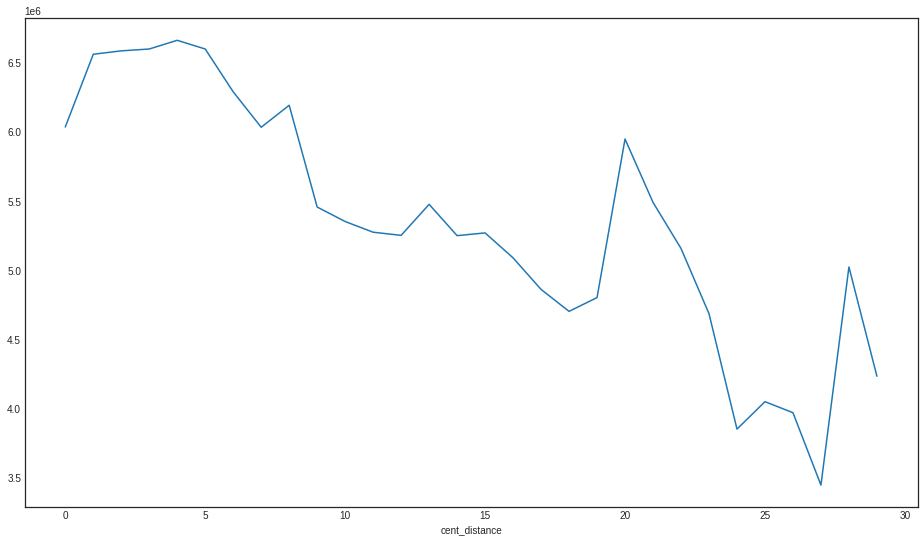

In [19]:
df_clear_SPB = df_clear[df_clear['locality_name'] == 'Санкт-Петербург'].copy()
df_clear_SPB['cent_distance'] = round(df_clear_SPB['cityCenters_nearest'] / 1000, 0)
print('Средние значения цены по удалённости от центра СПБ:\n')
print(df_clear_SPB.groupby('cent_distance')[['last_price','locality_name']].agg('mean'))
df_clear_SPB.groupby('cent_distance')['last_price'].agg('mean').plot(figsize=(16,9));

Исходя из полученного графика центральная зона приходится на расстояние до 8 км.

#### Вопрос Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

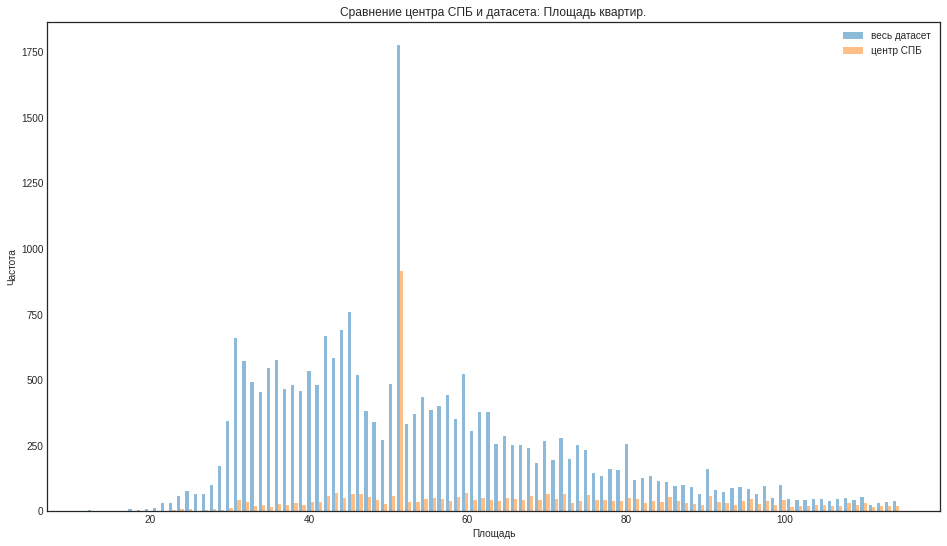

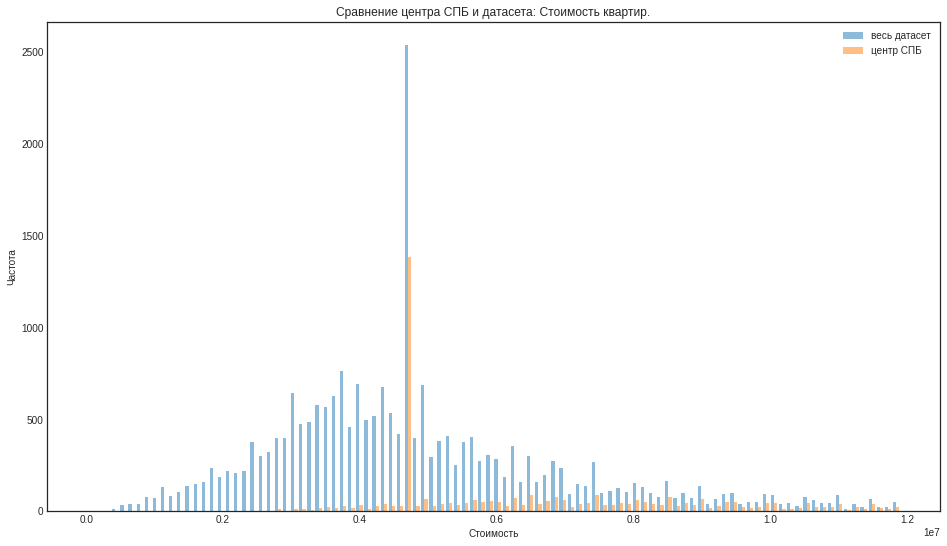

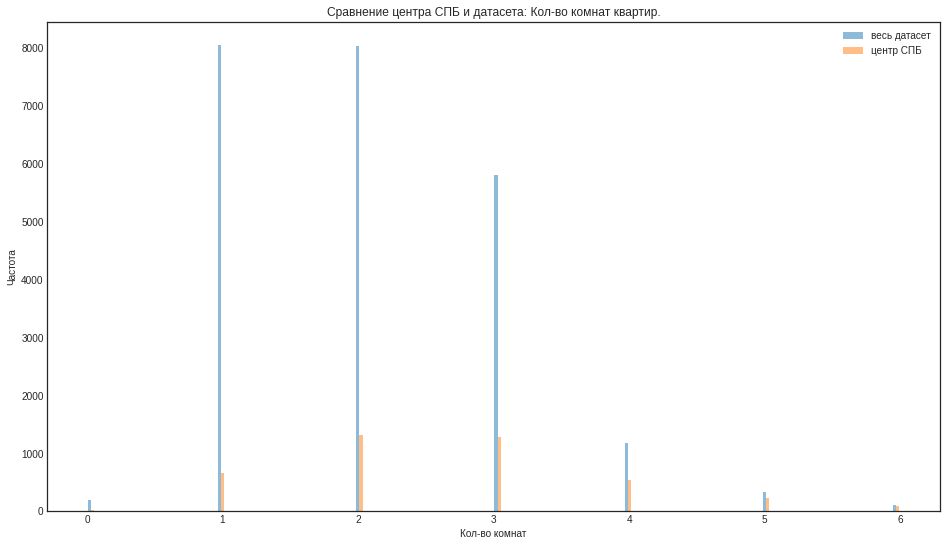

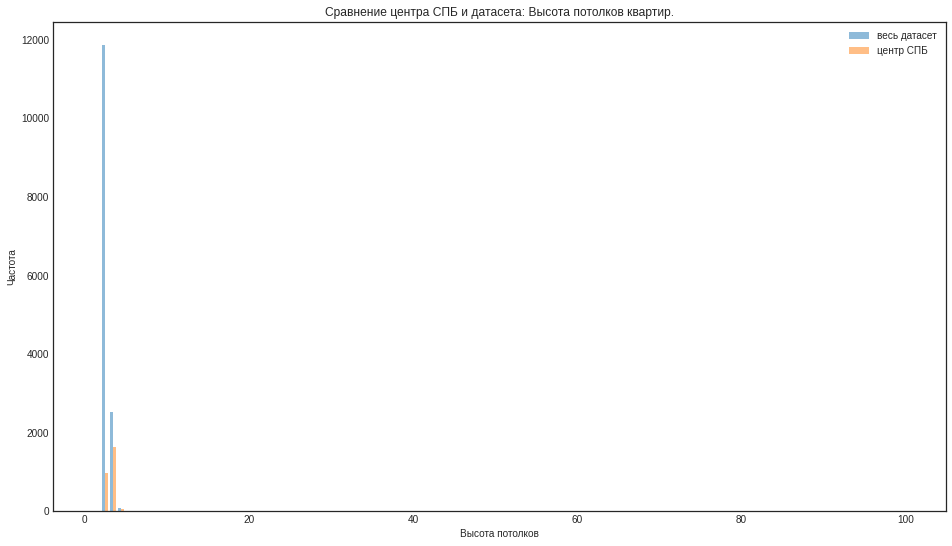

In [20]:
df_cntr_SPB = df_clear_SPB[df_clear_SPB['cent_distance'] <= 8].copy()
l_dict = {'total_area': ['Распределение площади', 'Площадь'],
          'last_price': ['Распределение стоимости', 'Стоимость'],
          'rooms': ['Распределение кол-ва комнат','Кол-во комнат'],
          'ceiling_height': ['Распределение высоты потолков', 'Высота потолков']}
for key in l_dict:
    plt.style.use('seaborn-white')
    plt.figure(figsize=(16,9))
    plt.hist([df_clear[key], df_cntr_SPB[key]], bins=100, alpha=0.5, label=['весь датасет', 'центр СПБ'])
    plt.legend(loc='upper right')
    plt.title(f'Сравнение центра СПБ и датасета: {l_dict[key][1]} квартир.')
    plt.xlabel(l_dict[key][1])
    plt.ylabel("Частота")
    plt.show();

In [21]:
print('Фи_Ка значений исследуемых параметров по цене(last_price):')
print(df_cntr_SPB[['last_price', 'meter_price', 'total_area', 'rooms', 'floor_category', 'cityCenters_nearest']].phik_matrix()['last_price'].sort_values(ascending=False))
print('\n')
print('Корреляция Пирсона значений исследуемых параметров по цене(last_price):')
print(df_cntr_SPB[['last_price','meter_price', 'total_area', 'rooms', 'floor_category', 'cityCenters_nearest']].corr()['last_price'].sort_values(ascending=False))
df_cntr_SPB.describe()

Фи_Ка значений исследуемых параметров по цене(last_price):
interval columns not set, guessing: ['last_price', 'meter_price', 'total_area', 'rooms', 'cityCenters_nearest']
last_price             1.000000
total_area             0.771931
rooms                  0.432339
meter_price            0.267598
cityCenters_nearest    0.205980
floor_category         0.180888
Name: last_price, dtype: float64


Корреляция Пирсона значений исследуемых параметров по цене(last_price):
last_price             1.000000
total_area             0.358695
rooms                  0.052552
meter_price            0.007249
cityCenters_nearest   -0.070984
Name: last_price, dtype: float64


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_exposition,month_exposition,year_exposition,liv/tot_area,kit/tot_area,cent_distance
count,4122.000000,4.122000e+03,4122.000000,4122.000000,2687.000000,4122.000000,4122.000000,4122.000000,4122.000000,4116.000000,4122.000000,4122.000000,2698.000000,4122.000000,2955.000000,3458.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4.122000e+03,4122.000000
mean,10.050704,6.443212e+06,64.906232,2.644105,3.130636,7.673702,38.955039,4.321689,18.129240,25213.232021,5050.362931,0.992965,467.026316,1.278991,467.452792,240.809717,198762.520441,2.531538,6.422610,2017.383309,0.581914,2.794895e-01,5.006793
std,5.929997,2.213801e+06,21.184061,1.187668,2.122037,4.378261,15.559766,2.899575,5.934517,5341.876674,1995.068855,0.919575,305.660275,1.077123,265.201827,271.064519,59783.646763,1.727379,3.446468,0.853838,0.098818,1.110358e-16,1.988551
min,0.000000,1.600000e+06,12.000000,0.000000,2.000000,2.000000,2.000000,1.000000,0.000000,11247.000000,181.000000,0.000000,9.000000,0.000000,22.000000,3.000000,24255.788313,0.000000,1.000000,2016.000000,0.300000,2.794895e-01,0.000000
25%,5.000000,4.650000e+06,52.000000,2.000000,2.800000,5.000000,30.000000,2.000000,14.533455,21801.750000,3794.250000,0.000000,286.000000,0.000000,238.000000,60.000000,161553.085698,1.000000,3.000000,2017.000000,0.526762,2.794895e-01,4.000000
50%,10.000000,5.700000e+06,58.650000,3.000000,3.000000,6.000000,34.800000,4.000000,16.378086,24497.500000,4993.000000,1.000000,441.000000,1.000000,453.000000,134.000000,178571.428571,3.000000,6.000000,2017.000000,0.577778,2.794895e-01,5.000000
75%,15.000000,8.036250e+06,80.000000,3.000000,3.250000,9.000000,50.000000,5.000000,22.359162,28348.000000,6473.000000,2.000000,592.000000,2.000000,665.000000,334.000000,237135.493373,4.000000,9.000000,2018.000000,0.653093,2.794895e-01,6.000000
max,26.000000,1.190000e+07,114.600000,6.000000,100.000000,28.000000,76.650000,17.000000,32.029500,44775.000000,8499.000000,3.000000,2295.000000,3.000000,1293.000000,1572.000000,359078.590786,6.000000,12.000000,2019.000000,0.826087,2.794895e-01,8.000000


Факторы, оказывающие влияние можно распределить по степени влияния: в первую очередь, оказывают влияние цена квадратного метра и общая площадь квартиры, во-вторую очередь - удалённость от центра города и количество комнат в квартире, в третью очередь - этаж расположения квартиры. Данные выводы аналогичны общему датасету.

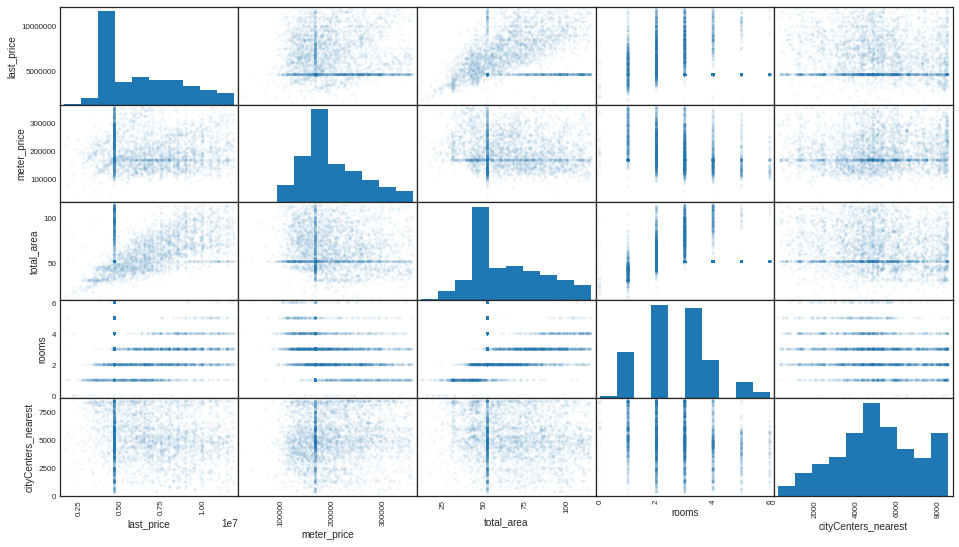

In [22]:
pd.plotting.scatter_matrix(df_cntr_SPB[['last_price', 'meter_price', 'total_area', 'rooms', 'cityCenters_nearest']], figsize=(16,9), alpha=0.05);

Из полученной матрицы диаграмм рассеяния можно сделать следующие выводы: цена квартир зависит от стоимости квадратного метра - заметно три луча, показывающих прямую зависимость. Лучи, в отличие от общего датасета, точно ориентированы относительно друг друга (90 и 45 град). Каждый луч демонстрирует группу квартир, в которых при разной интенсивности роста стоимости квадратного метра или его отсутствии, наблюдается разная интенсивность роста стоимости квартиры или его отсутствие. Цена квартир также прямо зависит от комнатности - чем больше комнат, тем выше начальная стоимость квартир, тем больше дорогих квартир. Удалённость квартир в 5 км от центра не изменяет цену большинства квартир.

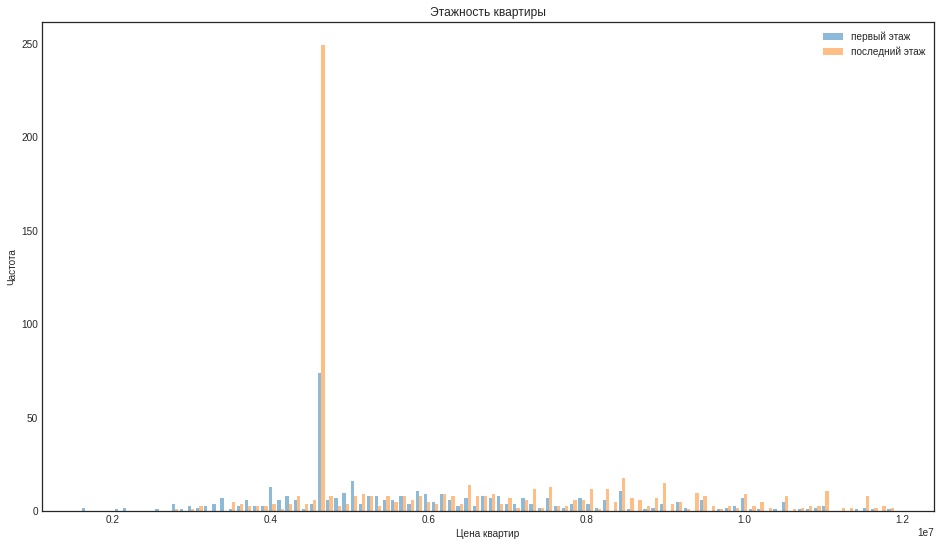

In [23]:
plt.style.use('seaborn-white')
plt.figure(figsize=(16,9))
plt.hist([df_cntr_SPB[df_cntr_SPB['floor_category'] == 'первый']['last_price'], df_cntr_SPB[df_cntr_SPB['floor_category'] == 'последний']['last_price']], bins=100, alpha=0.5, label=['первый этаж', 'последний этаж'])
plt.legend(loc='upper right')
plt.title(f'Этажность квартиры')
plt.xlabel('Цена квартир')
plt.ylabel("Частота")
plt.show();

Гистограмма показывает по данным датасета центра СПБ взаимосвязь цены объектов и этажа, на котором они расположены - частота продаж и стоимость объектов, расположенных на последнем этаже выше, чем на первом. Выводы аналогичны общему датасету.

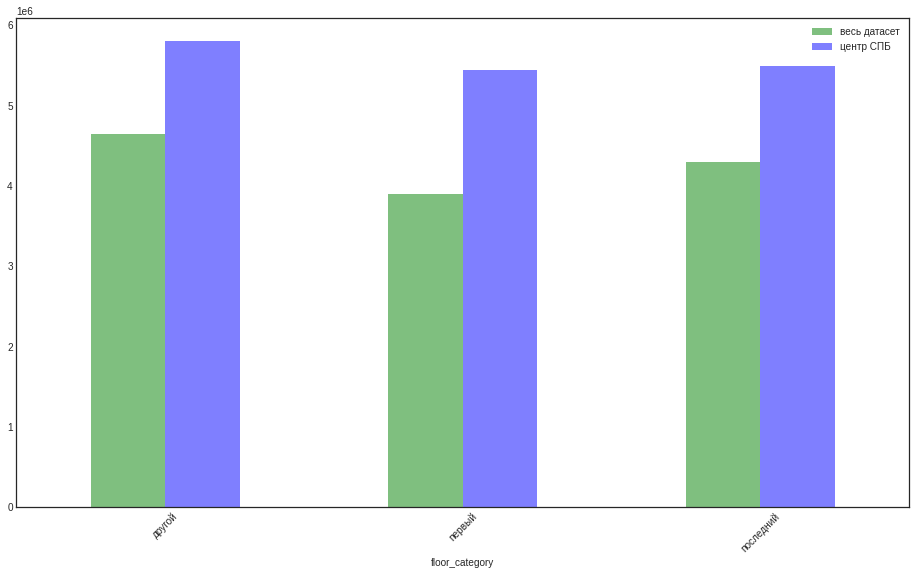

In [24]:
cntr = df_cntr_SPB.groupby('floor_category')['last_price'].agg('median').reset_index()
clear = df_clear.groupby('floor_category')['last_price'].agg('median').reset_index()
cntr_m = cntr.merge(clear, how='inner', on='floor_category')
ax = cntr_m[['floor_category','last_price_y', 'last_price_x']].plot(x='floor_category', 
                                                      kind='bar', 
                                                      color=["g","b"],
                                                      rot=45,
                                                      figsize=(16,9),
                                                      alpha=0.5)
ax.legend(["весь датасет", "центр СПБ"]);

Сравнение уровней седней цены в зависимости от этажности в центре СПБ и во всём датасете. Медианные цены в центре СПб выше, чем по общему датасету. 

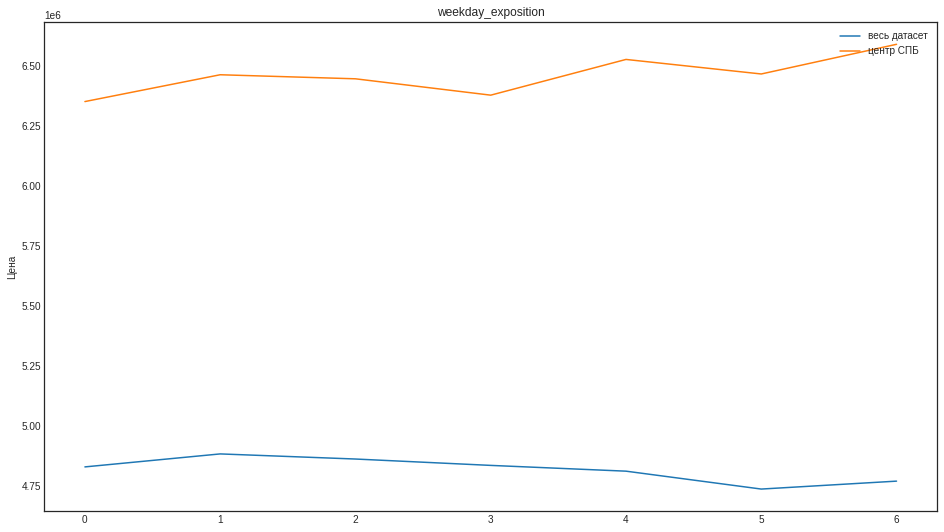

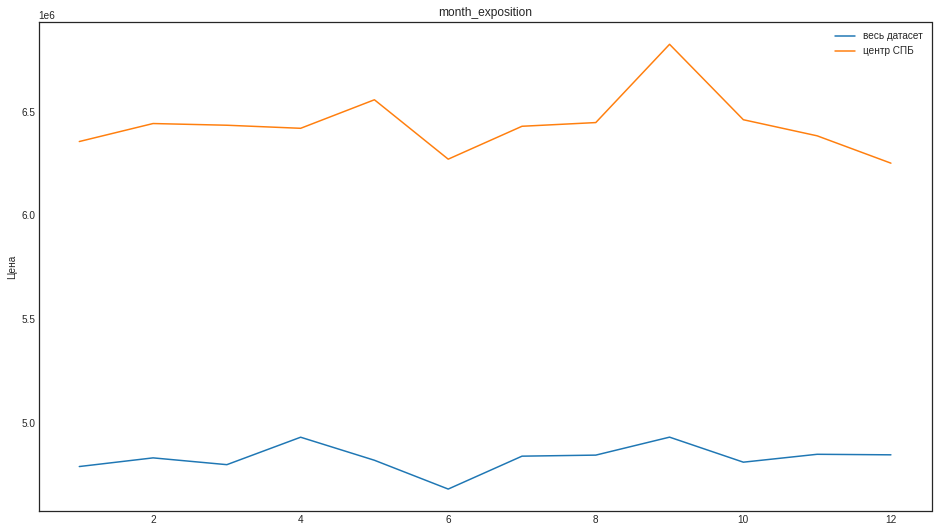

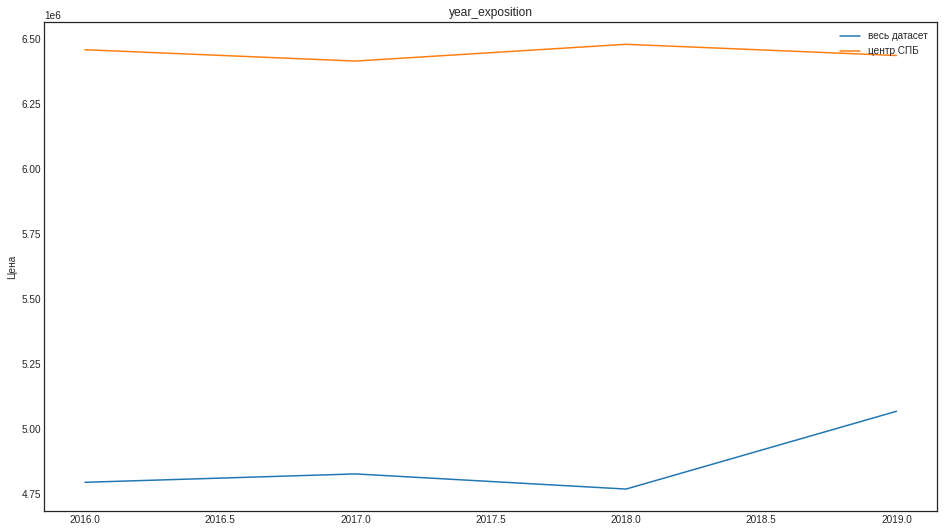

In [25]:
for col in ['weekday_exposition', 'month_exposition', 'year_exposition']:
    plt.figure(figsize=(16,9))
    plt.plot(df_clear.groupby(col)['last_price'].agg('mean'), label='весь датасет')
    plt.plot(df_cntr_SPB.groupby(col)['last_price'].agg('mean'), label='центр СПБ')
    plt.legend(loc="upper right")
    plt.title(col)
    plt.ylabel("Цена")
    plt.show();

Сравнение графиков времени экспозиции объектов показывает, что цены аналогично зависят от дня недели, месяца и года экспозиции квартир, уровень цены квартир центра СПб заметно выше уровня по всему датасету.

## Общий вывод

Нами проведено исследование датасета, содержащего данные о продаже квартир. В процессе исследования нами проведена предобработка данных в необходимом объёме, данные нормализованы путём определения и устранения выбросов, изучены основные параметры влияющие на ценообразование, выделена группа данных по квартирам, расположенным в центре СПб, проведено сравнение по ключевым параметрам квартир по данным всего датасета, каждый шаг исследования окончен выводом в произвольной форме. В процессе исследования улучшены навыки программирования исследователя в среде Python с применением Pandas, Plot, Matplotlib, иных модулей и библиотек, изучены новые приёмы и способы оптимизации кода, вывода графиков.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод